In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Load data
data = pd.read_csv('C:/Users/ALVIN OKORO-IJAGHA/Downloads/Salary_dataset.csv')
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [2]:
# .values will make it like an array, no difference
y_train=data['Salary'].values
print(y_train)

[ 39344.  46206.  37732.  43526.  39892.  56643.  60151.  54446.  64446.
  57190.  63219.  55795.  56958.  57082.  61112.  67939.  66030.  83089.
  81364.  93941.  91739.  98274. 101303. 113813. 109432. 105583. 116970.
 112636. 122392. 121873.]


In [3]:
x_train=data['YearsExperience'].values
print(x_train)

[ 1.2  1.4  1.6  2.1  2.3  3.   3.1  3.3  3.3  3.8  4.   4.1  4.1  4.2
  4.6  5.   5.2  5.4  6.   6.1  6.9  7.2  8.   8.3  8.8  9.1  9.6  9.7
 10.4 10.6]


In [4]:
# Check for missing values
data[data.isnull().any(axis=1)]

from sklearn.model_selection import train_test_split

# Assuming you have your data in X (features) and y (target)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

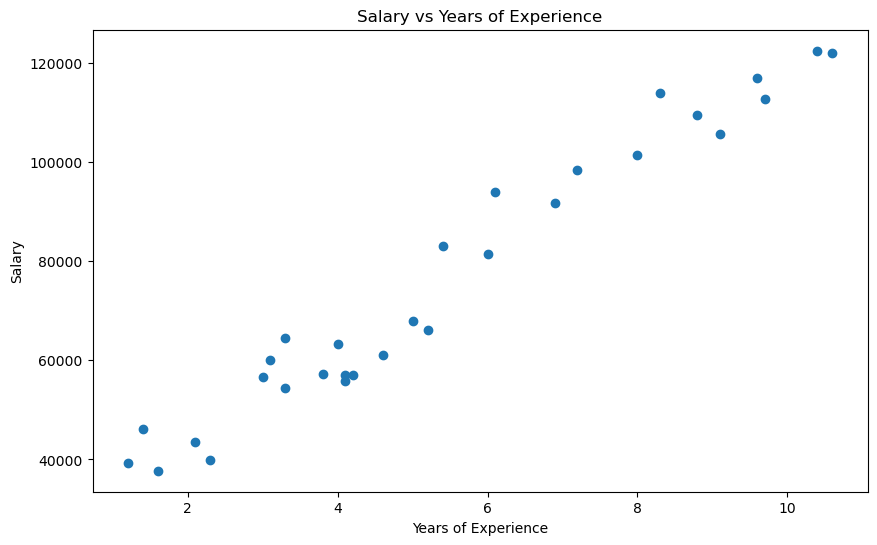

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(data['YearsExperience'], data['Salary'])
plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


In [7]:
#Define the model function
def model(x,w,b):
    m=x.shape[0]
    f_wb=np.zeros(m)
    for i in range(m):
        f_wb[i]=np.dot(w,x[i])+b
    return f_wb
        

In [8]:
#Define the cost function
def compute_cost(x,y,w,b,lambda_=1):
    m=x.shape[0]
    n=len(w)
    cost=0
    for i in range(m):
        fwb=np.dot(x[i],w)+b
        cost+= (fwb-y[i]) **2
    cost=cost/(2*m)
    reg_cost=0
    for j in range(n):
        reg_cost+=(w[j]**2)
    reg_cost=(lambda_/(2*m))*reg_cost
    total_cost=cost+reg_cost
    return total_cost

In [9]:
#Define the gradient function
def compute_gradient(x,y,w,b,lambda_):
    # There was an  error suggests that x is not a 2D array as expected. The line m,n = x.shape is trying to unpack two values from x.shape, but it's only getting one value, which means x is likely a 1D array.
    if x.ndim == 1:
        x = x.reshape(-1, 1)
    m,n=x.shape
    dj_dw=np.zeros((n,))
    dj_db=0
    for i in range(m):
        fwb=np.dot(x[i],w)+b
        err=fwb-y[i]
        for j in range(n):
            dj_dw[j]+=err*x[i,j]
        dj_db+=err
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    for j in range(n):
        dj_dw[j]+=(lambda_/m)*w[j]
    return dj_dw,dj_db


In [10]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, compute_cost, compute_gradient, lambda_):
    if x.ndim == 1:
        x = x.reshape(-1, 1)
    m, n = x.shape
    J_history = []
    p_history = []
    
    # Initialize w properly 
    if np.isscalar(w_in):
        w = np.array([w_in] * n)
    else:
        w = w_in.copy()
    
    b = b_init
    
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b, lambda_)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i < 10000:
            J_history.append(compute_cost(x, y, w, b, lambda_))
            p_history.append((w.copy(), b))
        
            if i % (num_iters // 10) == 0:
                print(f'Iteration {i:4}: Cost {J_history[-1]:0.2e}, '
                      f'dj_db: {dj_db:0.3e}, b: {b:0.5e}')
                print(f'dj_dw: {dj_dw}')
                print(f'w: {w}')
    return w, b, J_history, p_history





#If w_in is a scalar:

#It creates a numpy array w by repeating the scalar value w_in n times.
#This effectively initializes all weights to the same value.


#If w_in is not a scalar (presumably it's already an array):

#It creates a copy of w_in and assigns it to w.
#This ensures that any modifications to w won't affect the original input.

#Repeating (when w_in is a scalar):
#This creates a consistent starting point for all features in your model.


In [11]:
#Initial Parameters
w_init=0
b_init=0
lambda_=0.01
iterations=1000
alpha= 1.0e-2

In [12]:
#Perform gradient descent
w_final,b_final,J_hist,p_hist=gradient_descent(x_train,y_train,w_init,b_init,alpha,iterations,compute_cost,compute_gradient,lambda_)
print(f'(w,b) found by gradient descent :{w_final},{b_final:8.4f}')

Iteration    0: Cost 1.29e+09, dj_db: -7.421e+04, b: 7.42086e+02
dj_dw: [-470606.07916667]
w: [4706.06079167]
Iteration  100: Cost 5.05e+07, dj_db: -4.032e+03, b: 6.43354e+03
dj_dw: [591.68293946]
w: [12057.06390376]
Iteration  200: Cost 3.71e+07, dj_db: -3.222e+03, b: 1.00415e+04
dj_dw: [472.74980266]
w: [11527.66420705]
Iteration  300: Cost 2.86e+07, dj_db: -2.574e+03, b: 1.29242e+04
dj_dw: [377.72320446]
w: [11104.67820314]
Iteration  400: Cost 2.32e+07, dj_db: -2.057e+03, b: 1.52274e+04
dj_dw: [301.79773399]
w: [10766.71586462]
Iteration  500: Cost 1.97e+07, dj_db: -1.643e+03, b: 1.70677e+04
dj_dw: [241.13390749]
w: [10496.68673553]
Iteration  600: Cost 1.75e+07, dj_db: -1.313e+03, b: 1.85381e+04
dj_dw: [192.66400901]
w: [10280.9356821]
Iteration  700: Cost 1.61e+07, dj_db: -1.049e+03, b: 1.97129e+04
dj_dw: [153.93695874]
w: [10108.55236472]
Iteration  800: Cost 1.52e+07, dj_db: -8.382e+02, b: 2.06516e+04
dj_dw: [122.99436407]
w: [9970.81951181]
Iteration  900: Cost 1.46e+07, dj_db

In [13]:
#Model prediction
model_pred=model(x_train,w_final,b_final)
model_pred
# Predicted value for your inputs in the data set

array([123641.1985618 , 108003.39008955,  62067.32770231,  33723.79984636,
        44474.79317103,  72818.32102698,  51316.33437764,  63044.69073183,
        62067.32770231, 100184.48585342,  35678.52590539,  37633.25196442,
       110935.4791781 ,  42520.067112  ,  92365.5816173 , 115822.29432567,
        80637.22526311, 125595.92462083,  89433.49252875,  54248.42346619,
        61089.9646728 ,  66954.14284989,  81614.58829263,  52293.69740716])

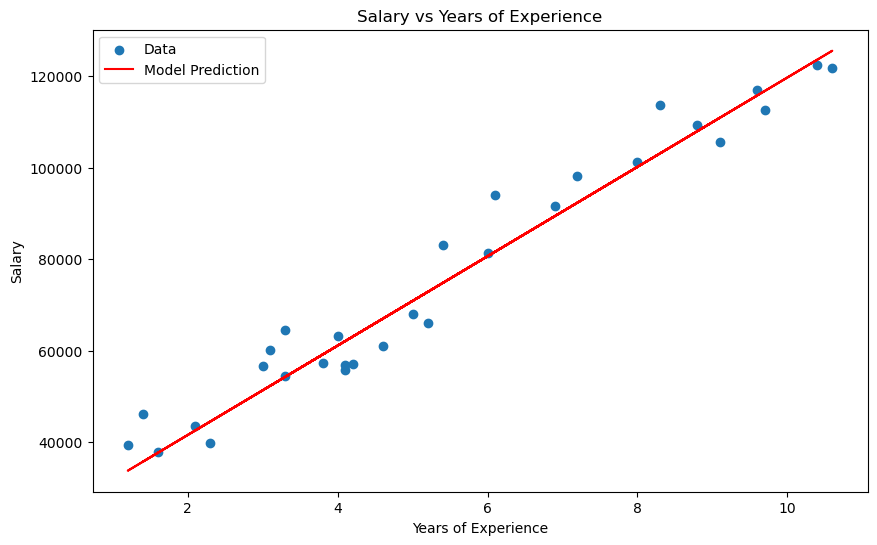

In [14]:
# Plot the data and model prediction
plt.figure(figsize=(10, 6))
plt.scatter(data['YearsExperience'], data['Salary'], label='Data')
plt.plot(x_train, model_pred, color='red', label='Model Prediction')
plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

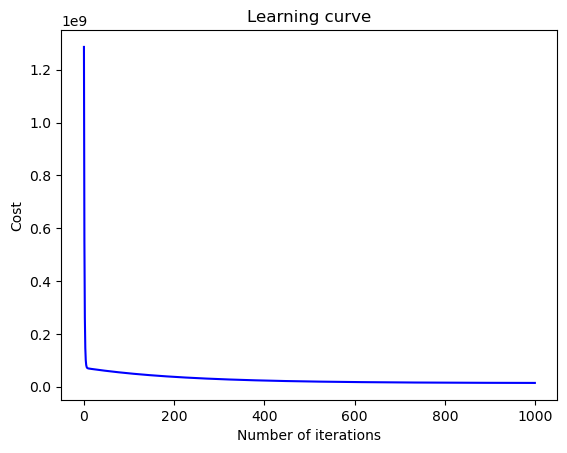

In [15]:
#Plot the learning curve
plt.plot(range(iterations),J_hist,'b-')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('Learning curve')
plt.show()

In [16]:
def predict_salary(yearsofexperience,weight,bias):
    prediction_salary=(weight*yearsofexperience)+bias
    return prediction_salary

y_pred = predict_salary(x_test, w_final, b_final)
# we are using the x_test data from the 20% part of the data we got splitting. we want to use those 4 years of experience(i.e from the data  we got from splitting) to make predictions and we are going to use y_pred in order to determine the accuracy

# If you want to predict for a specific number of years:
years=30
prediction = predict_salary(years, w_final, b_final)

print(f'Years:{years},pedicted_salary:{prediction}')

Years:30,pedicted_salary:[315204.35234687]


In [17]:
#Assessing the accuracy of your model is a crucial step in machine learning.

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


#For R², values range from 0 to 1, with 1 indicating perfect prediction.
#For error metrics (MSE, RMSE, MAE), lower values indicate better performance.
#You compare y_test (actual values) with y_test_pred (predicted values) to evaluate your model's performance on unseen data.

Mean Squared Error: 52872066.76918742
R-squared Score: 0.8964908248912873
